# Описание проекта
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br>
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. <br>

Описание данных: <br>
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Шаг 1. Откроем файл с данными и изучим общую информацию

In [2]:
#смотрим данные
import pandas as pd

try:
    data = pd.read_csv("/datasets/games.csv")
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.shape

(16715, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

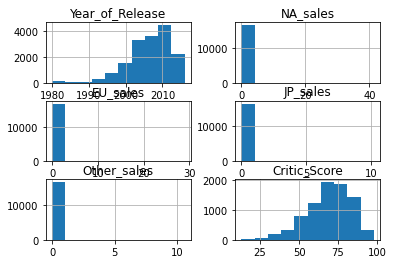

In [6]:
data.hist()

Всего у нас 16715 значений, после обработки должно остаться как минимум 80% (13372 значения)

# Шаг 2. Подготовим данные

Заменим названия столбцов (приведите к нижнему регистру); <br>
Преобразуем данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; <br>
Обработаем пропуски при необходимости <br>

In [7]:
#Заменила названия столбцов (приведите к нижнему регистру);
data.columns = ["name", "platform", "year_of_release", "genre", "na_sales", "eu_sales", "jp_sales", "other_sales", "critic_score", "user_score", "rating"]

In [8]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему

In [10]:
#Посмотрим какие уникальные значения присутствуют в датасете:
print(data["name"].unique())
print(" ")
print(data["platform"].unique())
print(" ")
print(data["year_of_release"].unique())
print(" ")
print(data["genre"].unique())
print(" ")
print(data["na_sales"].unique())
print(" ")
print(data["eu_sales"].unique())
print(" ")
print(data["jp_sales"].unique())
print(" ")
print(data["other_sales"].unique())
print(" ")
print(data["critic_score"].unique())
print(" ")
print(data["user_score"].unique())
print(" ")
print(data["rating"].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
 
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
 
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
 
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
 
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.04

Неявные дупликаты в названиях я не нашла, так что заменять никакие значения не будем.


Аномальных значений тоже нет


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Поменяем year_of_release с float на int, и в user_score с object на float

In [12]:
data["year_of_release"] = data["year_of_release"].astype("Int64")
#data["user_score"] = data["user_score"].astype("float")
#Не могу пока поменять на float столбец "user_score" потому что там присутствует значение tbd, надо его изменить

Посмотрела что значит tbd

"Как и в случае с предыдущими примерами, эта аббревиатура не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется"

https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie?ysclid=ld475gaio8936321784

In [13]:
#Изменим tbd на NaN 
data['user_score'].replace("tbd", np.NaN, inplace=True)
data["user_score"] = data["user_score"].astype("float")

In [14]:
#Посмотрим на пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Удалим значения где нет name, потому что при анализе видеоигр мы должны знать название игры, а если его нет, то проанализировать полноценно мы не сможем.

Количество игр без названия маленькое, так что мы можем позволить себе их удалить.

Причиной таких пропусков стало, скорее всего, невнимательно заполнение датасета или нехотение заполнять данные по этим видеоиграм

In [15]:
data = data.dropna(subset=['name'])

In [16]:
#Посмтрим на дупликаты, если они есть, то удалим их
data.duplicated().sum()

0

In [17]:
#Обработаем остальные пропуски 
#Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
#Опишите причины, которые могли привести к пропускам; 

В year_of_release мы пропуски не сможем обработать, потому что мы не можем заменить ничем значения выпуска года игры, скорее всего там забыли указать дату выхода игры при заполнении датафрейма или просто не знают точную дату выхода, поэтому удалим пропуски
В rating тоже не сможем обработать пропуски, но я думаю, что лучше оставить пропуски, так как тут слишком много значений 
В critic_score пропуски заменим на -1(чтобы нам самим понимать, что там был пропуск), пропуски могли возникнуть из-за того, что забыли заполнить эти данные или не проводили опрс среди критиков до данным видеоиграм
В user_score пропуски заменим на -1(чтобы знать, что там есть пропуски), пропуски могли возникнуть из-за того, что забыли заполнить эти данные или не проводили опрс среди пользователей до данным видеоиграм

In [18]:
#Сначала посмотрим сколько у нас осталось данных
data.shape

(16713, 11)

In [19]:
#Можем удалить игры без даты выхода
data = data.dropna(subset=['year_of_release'])

In [20]:
data["critic_score"] = data["critic_score"].fillna(-1)
data["user_score"] = data["user_score"].fillna(-1)

In [21]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [22]:
data["rating"] = data["rating"].fillna("неизвестно")

In [23]:
#Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец
data["sales_sum"] = data[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,неизвестно,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,неизвестно,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,неизвестно,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,неизвестно,0.01


In [24]:
data.shape

(16444, 12)

# Шаг 3. Проведем исследовательский анализ данных


Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [25]:
years = data.pivot_table(index = "year_of_release", values = "platform", aggfunc= ["count"])

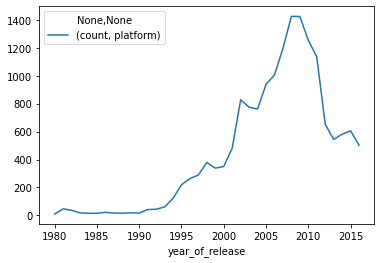

In [26]:
years.plot()
plt.show()

Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [27]:
platform = data[["platform", "sales_sum", 'name', "year_of_release"]]
pl = platform.groupby(["platform", "sales_sum"])["name"].count()
pl

platform  sales_sum
2600      0.07         2
          0.13         1
          0.14         1
          0.15         2
          0.16         3
                      ..
XOne      4.22         1
          4.49         1
          5.26         1
          5.47         1
          7.39         1
Name: name, Length: 3939, dtype: int64

Возьмем данные за соответствующий актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитываем в работе данные за предыдущие годы.

Года важны за тот период, который мы хотим проанализировать (2015 и 2016) для 2017. Потому что до 2015 года нет смысла анализировать рынок продаж видеоигр, так как динамика может сильно варьироваться и не зависит от предыдущих лет

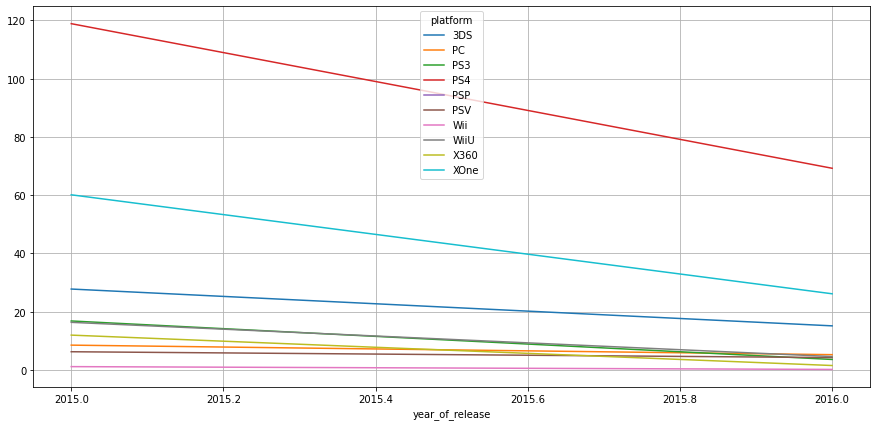

In [28]:
data_1 = data.query("2015 <= year_of_release <= 2016")
platform_data = data_1.pivot_table(index='year_of_release', columns = 'platform', values='sales_sum', aggfunc='sum')
platform_data.plot(grid=True, figsize=(15, 7))
plt.show()

In [29]:
data.shape

(16444, 12)

Выберем несколько потенциально прибыльных платформ, чтобы ответить на вопрос "Какие платформы лидируют по продажам, растут или падают?"
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.


In [30]:
#platform_data.sort_values(by = 'sales_sum')
platform_data

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [31]:
pl_data = data[["platform", "sales_sum", 'name', "year_of_release"]]
pl_data=data.query("2015 <= year_of_release <= 2016")
pl_data.groupby("platform")["sales_sum"].sum().sort_values(ascending = False)

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: sales_sum, dtype: float64

ВЫВОД: PS4 и XOne лидируют по продажам, но падает выручка, возможно потому что клиентская база уже не покупает данные видеоин=гры, так как уже у людей есть этот продукт. Возможно в 2017 году, когда эти компании выпустят новые игры, то продажи возрастут 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

In [32]:
data_score = data_1.query('platform == "XOne" & critic_score != -1 & user_score != -1')[["critic_score", "user_score", "sales_sum"]]

In [33]:
data_score.corr()

,critic_score,user_score,sales_sum
critic_score,1.000000,0.459443,0.422519
user_score,0.459443,1.000000,-0.068684
sales_sum,0.422519,-0.068684,1.000000


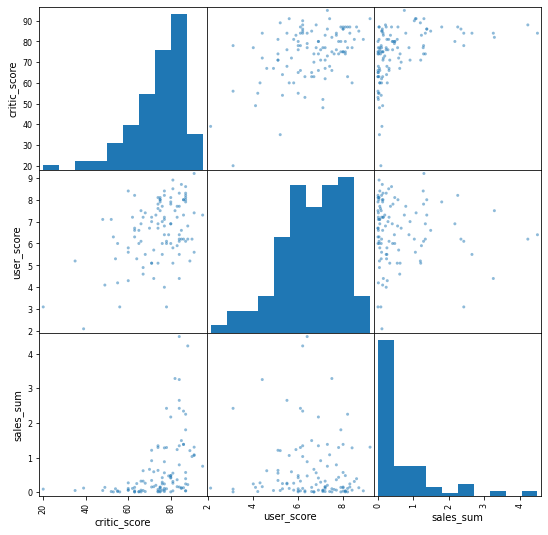

Text(0.5, 1.0, 'Корреляция между оценкой пользователей и продажами')

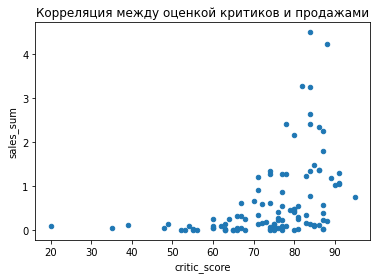

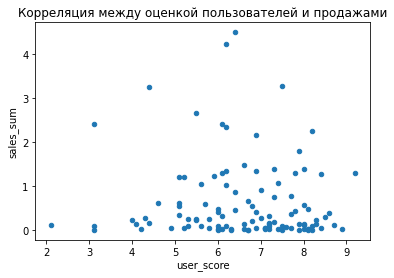

In [74]:
pd.plotting.scatter_matrix(data_score, figsize=(9, 9)) 

plt.show()

data_score.plot(x = "critic_score", y = "sales_sum", kind = "scatter")
plt.title("Корреляция между оценкой критиков и продажами")
data_score.plot(x = "user_score", y = "sales_sum", kind = "scatter")
plt.title("Корреляция между оценкой пользователей и продажами")

Видна слабая зависимость продаж от отзывов пользователей 6%
Коэффициент корреляции Пирсона: -0.06

Несмотря на более ответственное отношение критиков к процессу оценки, зависимость продаж от полученных баллов также невелика (коэффициент корреляции Пирсона 42,2%)
Коэффициент корреляции Пирсона: 0.422
Анализ не выявил сильной зависимости продаж от каких либо отзывов. Этот факт необходимо учитывать при бланировании рекламных компаний в предстоящем году.

Вывод: Нет корреляции между отзывами и продажами Платформы "XOne"

Соотнесём выводы с продажами игр на других платформах.

In [35]:
data_all_platfotms_score = data_1.query('critic_score != -1 & user_score != -1')[["critic_score", "user_score", "sales_sum"]]

In [36]:
data_all_platfotms_score.corr()

,critic_score,user_score,sales_sum
critic_score,1.000000,0.467901,0.323375
user_score,0.467901,1.000000,-0.014618
sales_sum,0.323375,-0.014618,1.000000


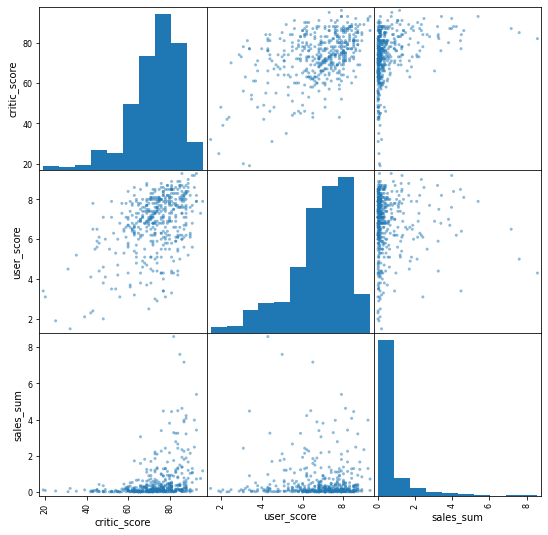

In [37]:
pd.plotting.scatter_matrix(data_all_platfotms_score, figsize=(9, 9)) 
plt.show()

Нет сильной корреляции между выручкой платформ и отзывами покупателей и критиков.
Вывод: Все пользователь, которые играют в видеоигры непонятно чего хотят

In [71]:
data_score_2 = data.query('platform == ["Will", "PS2"] & critic_score != -1 & user_score != -1')[["critic_score", "user_score", "sales_sum"]]

In [73]:
data_score_2.corr()

,critic_score,user_score,sales_sum
critic_score,1.000000,0.565841,0.386415
user_score,0.565841,1.000000,0.171690
sales_sum,0.386415,0.171690,1.000000


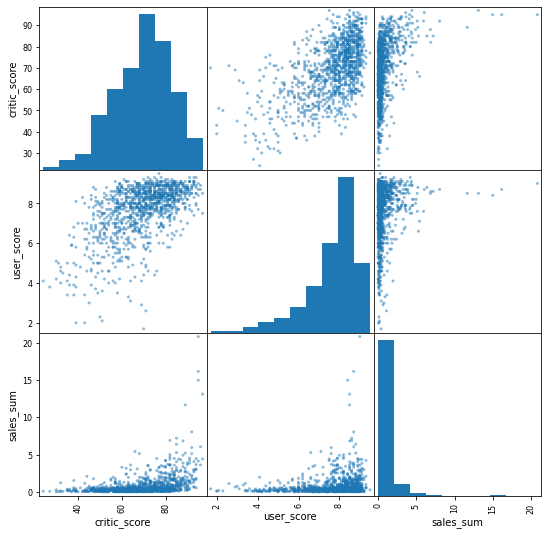

Text(0.5, 1.0, 'Корреляция между оценкой пользователей и продажами')

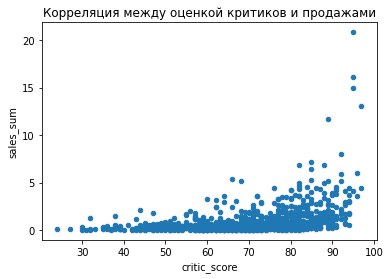

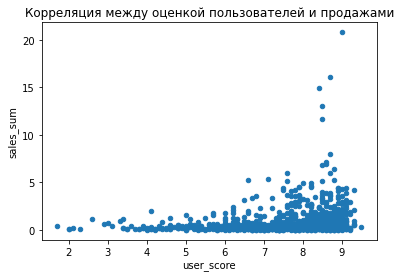

In [75]:
pd.plotting.scatter_matrix(data_score_2, figsize=(9, 9)) 

plt.show()

data_score_2.plot(x = "critic_score", y = "sales_sum", kind = "scatter")
plt.title("Корреляция между оценкой критиков и продажами")
data_score_2.plot(x = "user_score", y = "sales_sum", kind = "scatter")
plt.title("Корреляция между оценкой пользователей и продажами")

Видна слабая зависимость продаж от отзывов пользователей 17% Коэффициент корреляции Пирсона: 0.17

Несмотря на более ответственное отношение критиков к процессу оценки, зависимость продаж от полученных баллов также невелика (коэффициент корреляции Пирсона 38,6%) Коэффициент корреляции Пирсона: 0.386 Анализ не выявил сильной зависимости продаж от каких либо отзывов. Этот факт необходимо учитывать при бланировании рекламных компаний в предстоящем году.

Посмотрим на общее распределение игр по жанрам. 

In [42]:
genre_data = data[["year_of_release", "genre", "sales_sum"]].query(' 2015<= year_of_release <= 2016')
genre_data.groupby("genre")["sales_sum"].sum().sort_values(ascending = False)

genre
Shooter         105.73
Action          102.13
Sports           64.33
Role-Playing     55.82
Misc             14.17
Fighting         12.37
Adventure        11.98
Racing           10.86
Platform          9.28
Simulation        7.55
Strategy          2.98
Puzzle            0.72
Name: sales_sum, dtype: float64

In [82]:
genre_data = data[["year_of_release", "genre", "sales_sum"]].query('2015<= year_of_release <= 2016')
genre_data.groupby("genre")["sales_sum"].median().sort_values(ascending = False)

genre
Shooter         0.380
Sports          0.120
Role-Playing    0.115
Platform        0.100
Simulation      0.100
Fighting        0.090
Action          0.060
Misc            0.060
Racing          0.055
Strategy        0.050
Adventure       0.030
Puzzle          0.030
Name: sales_sum, dtype: float64

Ответим на вопросы: Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? <br>
Вывод: самые прибыльные жанры выделяются от жанров с низкимии продажамиShooter, Action, Sports, Role-Playing

Если рассматривать медианы, то выдяляющимися жанрами являеются Shooter, Sports, Role-Playing

# Шаг 4. Составим портрет пользователя каждого региона


In [43]:
#Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишем различия в долях продаж.
data_2015_2016 = data.query("2015 <= year_of_release <= 2016")
data_2015_2016[["platform", "genre", "na_sales", "eu_sales", "jp_sales", "rating", "sales_sum"]]

,platform,genre,na_sales,eu_sales,jp_sales,rating,sales_sum
31,PS4,Shooter,6.03,5.86,0.36,неизвестно,14.63
77,PS4,Sports,1.12,6.12,0.06,E,8.58
87,PS4,Shooter,2.99,3.49,0.22,неизвестно,7.98
94,PS4,Sports,0.66,5.75,0.08,E,7.60
99,XOne,Shooter,4.59,2.11,0.01,неизвестно,7.39
...,...,...,...,...,...,...,...
16699,PSV,Action,0.00,0.00,0.01,неизвестно,0.01
16703,PSV,Adventure,0.00,0.00,0.01,неизвестно,0.01
16710,PS3,Action,0.00,0.00,0.01,неизвестно,0.01
16712,PSV,Adventure,0.00,0.00,0.01,неизвестно,0.01


In [44]:
na_top_platform = data_2015_2016.groupby("platform")["na_sales"].sum()
eu_top_platform = data_2015_2016.groupby("platform")["eu_sales"].sum()
jp_top_platform = data_2015_2016.groupby("platform")["jp_sales"].sum()

In [45]:
#Проанализируем продажи платформ в Северной Америке (миллионы проданных копий) 

na_platform = data_2015_2016.groupby("platform")["na_sales"].sum() / data_2015_2016.groupby("platform")["sales_sum"].sum()
na_platform.sort_values(ascending = False)

platform
X360    0.597181
XOne    0.582918
WiiU    0.422912
Wii     0.371212
PS4     0.339410
PS3     0.277179
PC      0.270153
3DS     0.240214
PSV     0.051429
PSP     0.000000
dtype: float64

In [46]:
#Проанализируем продажи платформ в Европе
eu_platform = data_2015_2016.groupby("platform")["eu_sales"].sum() / data_2015_2016.groupby("platform")["sales_sum"].sum()
eu_platform.sort_values(ascending = False)

platform
PC      0.660857
Wii     0.553030
PS4     0.444007
PS3     0.357493
XOne    0.325646
X360    0.312315
WiiU    0.309785
3DS     0.172181
PSV     0.102857
PSP     0.000000
dtype: float64

In [47]:
# Проанализируем продажи платформ в Японии
jp_platform = data_2015_2016.groupby("platform")["jp_sales"].sum() / data_2015_2016.groupby("platform")["sales_sum"].sum()
jp_platform.sort_values(ascending = False)

platform
PSP     1.000000
PSV     0.800952
3DS     0.548695
PS3     0.243389
WiiU    0.196659
PS4     0.064045
XOne    0.002086
PC      0.000000
Wii     0.000000
X360    0.000000
dtype: float64

Таблица с продажами платформ в Северной Америке
platform
PS4     63.86
XOne    50.30
3DS     10.31
WiiU     8.86
X360     8.05
Name: na_sales, dtype: float64



[]

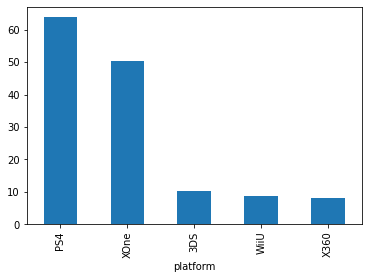

In [48]:
print("Таблица с продажами платформ в Северной Америке")
print(na_top_platform.sort_values(ascending = False).head(5))
print()
na_top_platform.sort_values(ascending = False).head(5).plot(kind = "bar")
plt.plot()

Самые большие в Северной Америке у платформ PS4 и XOne

Таблица с продажами платформ в Европе
platform
PS4     83.54
XOne    28.10
PC       9.10
3DS      7.39
PS3      7.30
Name: eu_sales, dtype: float64



[]

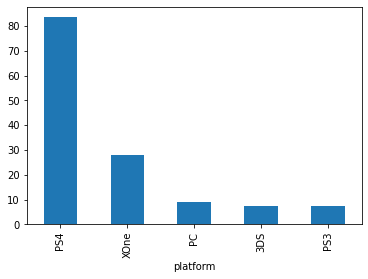

In [49]:
print("Таблица с продажами платформ в Европе")

print(eu_top_platform.sort_values(ascending = False).head(5))
print()
eu_top_platform.sort_values(ascending = False).head(5).plot(kind = "bar")
plt.plot()

У платформ PS4 и XOne самые большие продажи в Европе

Таблица с продажами платформ в Японии
platform
3DS     23.55
PS4     12.05
PSV      8.41
PS3      4.97
WiiU     4.12
Name: jp_sales, dtype: float64



[]

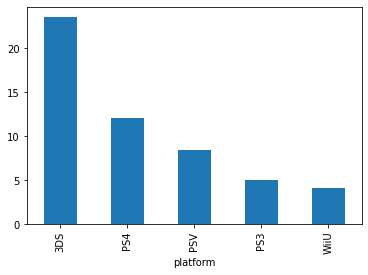

In [50]:
print("Таблица с продажами платформ в Японии")
print(jp_top_platform.sort_values(ascending = False).head(5))
print()
jp_top_platform.sort_values(ascending = False).head(5).plot(kind = "bar")
plt.plot()

Самые большие продажи в Японии у платформ 3DS и PS4

В Европе платформы распределены равномерно, это значит, что есть конкуренция, спрос и продажи.

Большую часть продаж в Японии занимают национальные платформы, которые продаются полностью или преимущественно в Японии (3DS, PSP, PSV,).
Платформы WiiU, PS3 популярны одинаково как в Японии так и в других странах.
В Северной Америке платформы распределены ещё более равномерно чем даже в Европе, что говорит о самой высокой конкуренции, а также о стабильном спросе.

In [51]:
#Определим для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясним разницу.
na_top_genre = data_2015_2016.groupby("genre")["na_sales"].sum()
eu_top_genre = data_2015_2016.groupby("genre")["eu_sales"].sum()
jp_top_genre = data_2015_2016.groupby("genre")["jp_sales"].sum()

genre
Shooter         48.18
Action          33.68
Sports          26.31
Role-Playing    19.82
Misc             5.58
Name: na_sales, dtype: float64


[]

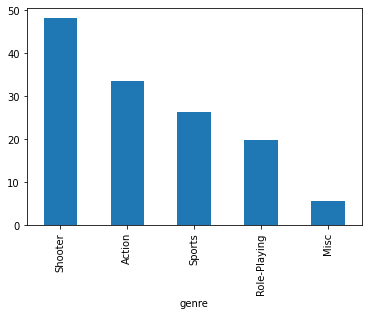

In [52]:
print(na_top_genre.sort_values(ascending = False).head(5))
na_top_genre.sort_values(ascending = False).head(5).plot(kind = "bar")
plt.plot()

Самые популярные жанры в Северной Америке: Shooter, Action, Sports

genre
Shooter         40.28
Action          34.82
Sports          27.82
Role-Playing    17.21
Racing           6.52
Name: eu_sales, dtype: float64


[]

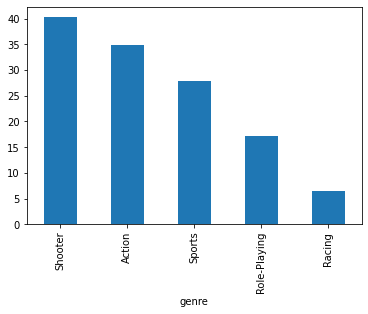

In [53]:
print(eu_top_genre.sort_values(ascending = False).head(5))
eu_top_genre.sort_values(ascending = False).head(5).plot(kind = "bar")
plt.plot()

Самые популярные жанры в Европе: Shooter, Action, Sports

genre
Action          23.05
Role-Playing    13.41
Shooter          3.79
Misc             3.19
Adventure        2.22
Name: jp_sales, dtype: float64


[]

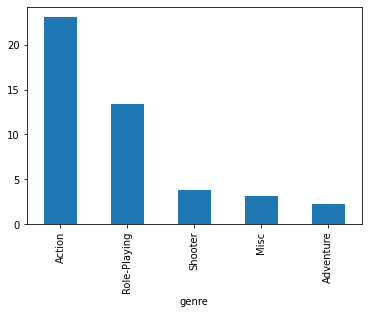

In [54]:
print(jp_top_genre.sort_values(ascending = False).head(5))
jp_top_genre.sort_values(ascending = False).head(5).plot(kind = "bar")
plt.plot()

Самые популярные жанры в Японии: Action, Role-Playing

In [55]:
#Определим для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?
na_top_rating = data_2015_2016.groupby("rating")["na_sales"].sum()
eu_top_rating = data_2015_2016.groupby("rating")["eu_sales"].sum()
jp_top_rating = data_2015_2016.groupby("rating")["jp_sales"].sum()

rating
M             47.03
неизвестно    37.44
E             26.59
T             22.86
E10+          17.87
Name: na_sales, dtype: float64


[]

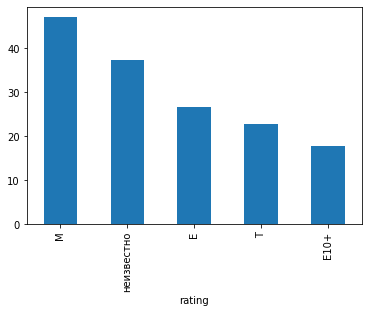

In [56]:
print(na_top_rating.sort_values(ascending = False).head(5))
na_top_rating.sort_values(ascending = False).head(5).plot(kind = "bar")
plt.plot()

По рейтингу ESRB самые популярные игры в Северной Америке - Для взрослых (M), для всех (E), для подростков (T)

rating
M             45.54
неизвестно    35.71
E             34.83
T             20.32
E10+          11.54
Name: eu_sales, dtype: float64


[]

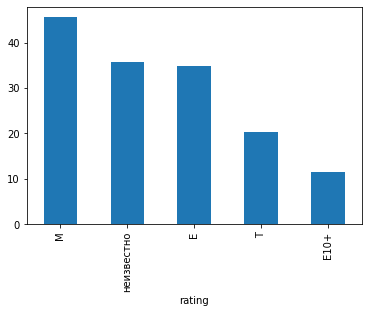

In [57]:
print(eu_top_rating.sort_values(ascending = False).head(5))
eu_top_rating.sort_values(ascending = False).head(5).plot(kind = "bar")
plt.plot()

По рейтингу ESRB самые популярные игры в Европе - Для взрослых (M), с неизвестным рейтингом, для всех (E), для подростков (T)

rating
неизвестно    32.89
T              7.70
E              5.25
M              4.29
E10+           3.27
Name: jp_sales, dtype: float64


[]

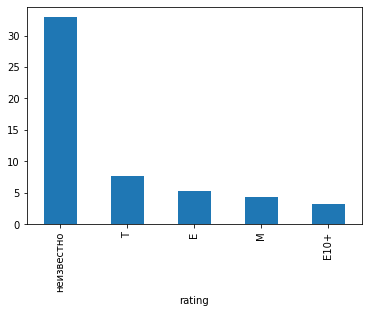

In [58]:
print(jp_top_rating.sort_values(ascending = False).head(5))
jp_top_rating.sort_values(ascending = False).head(5).plot(kind = "bar")
plt.plot()

По рейтингу ESRB самые популярные игры в Японии - для подростков (T), для всех (E), для взрослых (M), но самые популярные игры с неизвестным рейтиногом 

# Шаг 5. Проверим гипотезы


**Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

H_0: Рейтинг (user_score) пользователей платформ Xbox One = рейтинг (user_score) пользователей платформ PC `

H_1: Рейтинг (user_score) пользователей платформ Xbox One ≠ рейтинг (user_score) пользователей платформ PC`

alpha = 0.05

In [59]:
from scipy import stats as st

In [60]:
data_for_hypotesis = data.query("2015 <= year_of_release <= 2016 & platform == ['XOne', 'PS4'] & user_score != -1")
data_for_hypotesis

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16544,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,-1.0,6.8,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-1.0,6.6,E,0.01


In [61]:
PS4 = data_for_hypotesis.query("platform == 'PS4'")
XOne = data_for_hypotesis.query("platform == 'XOne'")
PS4["user_score"]

77       4.3
94       5.0
105      6.5
171      7.9
231      8.1
        ... 
16486    2.3
16499    6.8
16500    7.5
16526    7.9
16530    5.5
Name: user_score, Length: 190, dtype: float64

In [62]:
alpha = 0.05 #задали значение уровня значимости
results = st.ttest_ind(
    PS4["user_score"], 
    XOne["user_score"], equal_var = False)
    # проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) # выводим на экран получившеся p-значение)
# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06942429992690709
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза состоит в том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
Для проверки использованы оценки пользователей по платформам Xbox One и PC.
Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. Дисперсии выборок не равны, поэтому параметр равной дисперсии equal_var == False

В итоге, не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

H_0: Рейтинг (user_score) пользователей жанра Action = рейтинг (user_score) пользователей жанра Sports `

H_1: Рейтинг (user_score) пользователей жанра Action ≠ рейтинг (user_score) пользователей жанра Sports`

alpha = 0.05

In [63]:
data_for_hypotesis_action = data.query("2015 <= year_of_release <= 2016 & genre == ['Action', 'Sports'] & user_score != -1")
data_for_hypotesis_action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
305,Batman: Arkham Knight,PS4,2015,Action,1.53,1.69,0.10,0.64,87.0,7.6,M,3.96
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
16544,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,-1.0,6.8,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-1.0,6.6,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01


In [64]:
action = data_for_hypotesis_action.query("genre == 'Action'")
sports = data_for_hypotesis_action.query("genre == 'Sports'")

In [65]:
#Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
alpha = 0.05 #задали значение уровня значимости
results = st.ttest_ind(
    action["user_score"], 
    sports["user_score"], equal_var = False)
    # проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) # выводим на экран получившеся p-значение)
# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha: # сравниваем получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


Проверили гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. Дисперсии выборок не равны, поэтому параметр равной дисперсии equal_var == False

Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Т.к. полученная вероятность совпадения значений меньше критического уровня статистической значимости

# Шаг 6. Напишем общий вывод


1) Было вначале нам предоставлено 16713 данных по видеоиграм, продаваемых по всему миру, после корректировки и удаления некоторых пропущенных данных нами проанализтировнао 16444
2) Больше всего выручку получают платформы PS4 и XOne
3) При анализе платформ из ТОП-10. Вывод об отсутствии зависимости подтверждается. Анализ не выявил сильной зависимости продаж от каких либо отзывов.
4) По глобальным продажам есть три выдяляющихся жанра являеются Shooter, Sports, Role-Playing
5) По статическому тесту определили, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы
6) По статическому тесту определили, что средние пользовательские рейтинги жанров Action и Sports разные
7)В Европе платформы распределены равномерно, это значит, что есть конкуренция, спрос и продажи.
Большую часть продаж в Японии занимают национальные платформы, которые продаются полностью или преимущественно в Японии (3DS, PSP, PSV,). В Северной Америке платформы распределены ещё более равномерно чем даже в Европе, что говорит о самой высокой конкуренции, а также о стабильном спросе.